# This notebooks runs a site-level and gene-level overlap between two edit calls.

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import glob
import os
import numpy as np
import pandas as pd
import gffutils
import pysam
import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import OrderedDict
from tqdm import tnrange, tqdm_notebook
from matplotlib_venn import venn2, venn3

pd.set_option('display.max_columns', 150)

In [2]:
f1 = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/RBFOX2-TIA1-STAMP_possorted_genome_bam_MD-34_barcodes.tsv.fx.annotated'
f2 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'

# f1 = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/sailor_outputs_groups_deep/combined_outputs_w_cov_info/APOBEC-STAMP_possorted_genome_bam_MD.fx.annotated'
# f2 = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated'

output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/outputs/'

In [3]:
def stringify_coords(row):
    if not str(row['chrom']).startswith('chr'):
        chrom = 'chr' + str(row['chrom'])
    else:
        chrom = str(row['chrom'])
        
    return "{}:{}-{}:{}".format(
        chrom, row['start'], row['end'], row['strand']
    )
    
def overlap(fg, bg, output_file, conf=0, level='edit'):
    names = ['chrom','start','end','conf','frac','strand', 'geneid', 'genename', 'region', 'annotation']
    df1 = pd.read_csv(fg, sep='\t', names=names)
    df2 = pd.read_csv(bg, sep='\t', names=names)
    df1 = df1[df1['conf']>=conf]
    df2 = df2[df2['conf']>=conf]
    
    fig, ax = plt.subplots(figsize=(5, 5))
    if level == 'edit':
        df1['coord'] = df1.apply(stringify_coords, axis=1)
        df2['coord'] = df2.apply(stringify_coords, axis=1)
        venn2([set(df1['coord']), set(df2['coord'])], [os.path.basename(f1), os.path.basename(f2)], ax=ax)
        fig.suptitle("Overlap at conf {}: ({}%)".format(conf, len(set(df1['coord']).intersection(set(df2['coord'])))/len(set(df1['coord']))))
    elif level == 'gene':
        venn2([set(df1['geneid']), set(df2['geneid'])], [os.path.basename(f1), os.path.basename(f2)], ax=ax)
        fig.suptitle("Overlap at conf {}: ({}%)".format(conf, len(set(df1['geneid']).intersection(set(df2['geneid'])))/len(set(df1['geneid']))))
    else:
        print("wrong level {}".format(level))
    fig.savefig(output_file)

# edit level overlapping venns

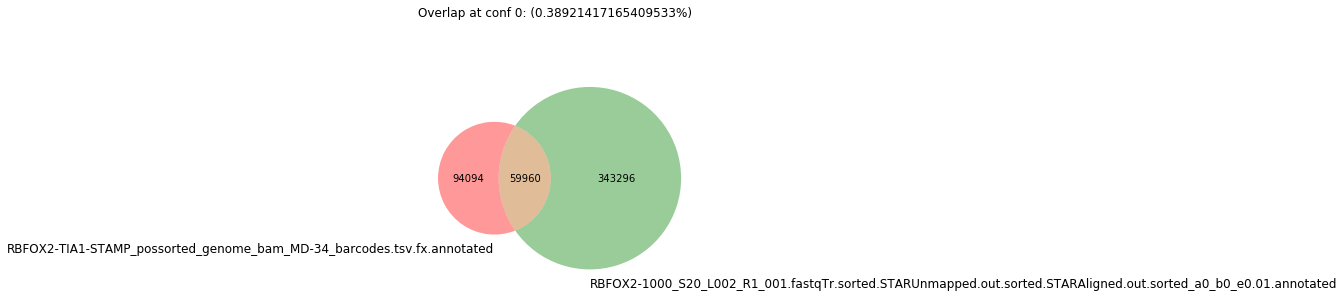

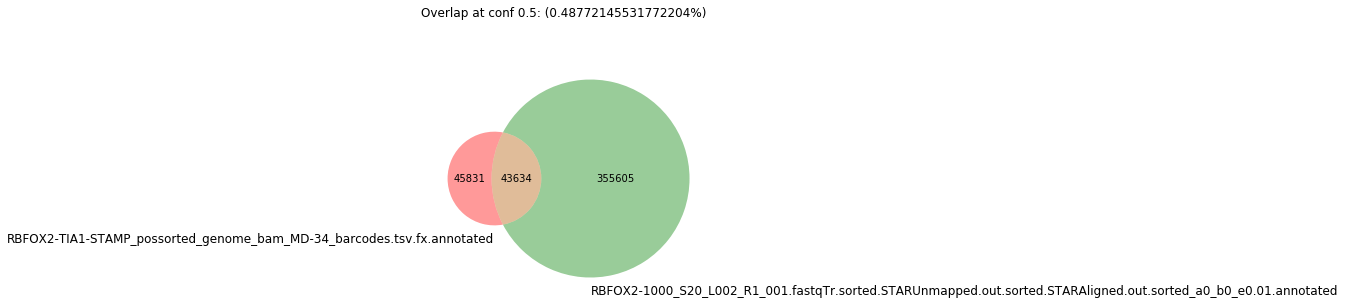

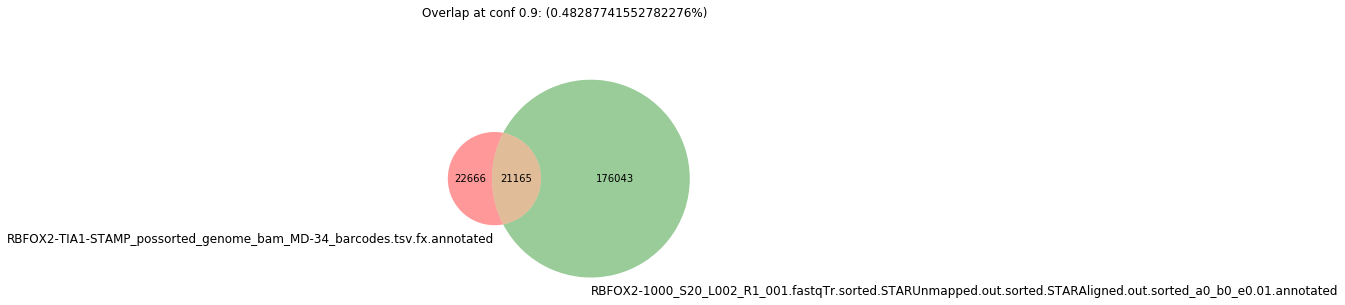

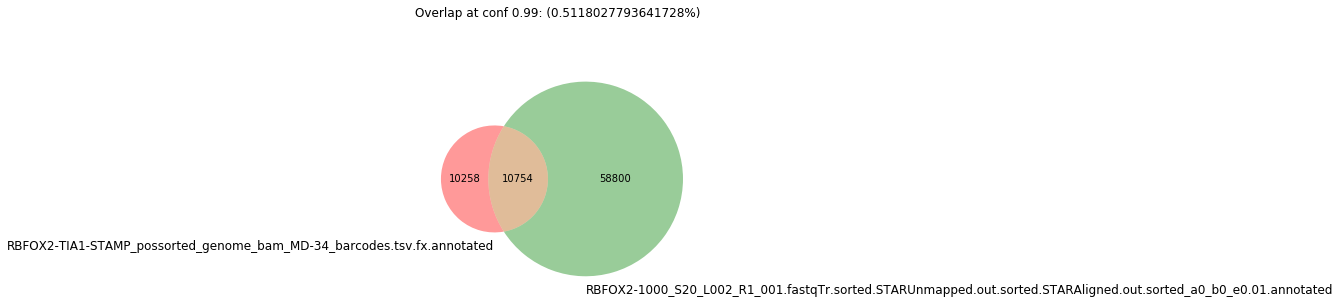

In [4]:
progress = tnrange(4)
for conf in [0, 0.5, 0.9, 0.99]:
    output_file = os.path.join(output_dir, 'overlapping_editlevel_{}_{}.conf{}.svg'.format(os.path.basename(f1), os.path.basename(f2), conf))
    overlap(f1, f2, output_file, conf=conf, level='edit')
    progress.update(1)

# Now do venn for gene level

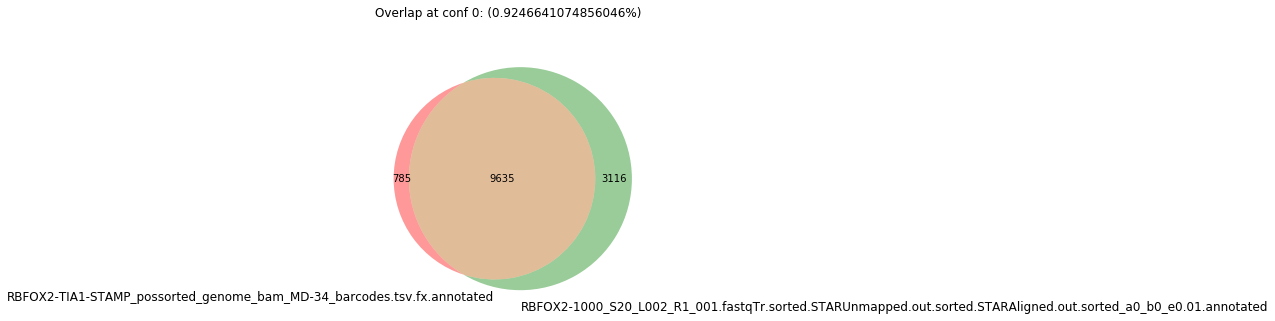

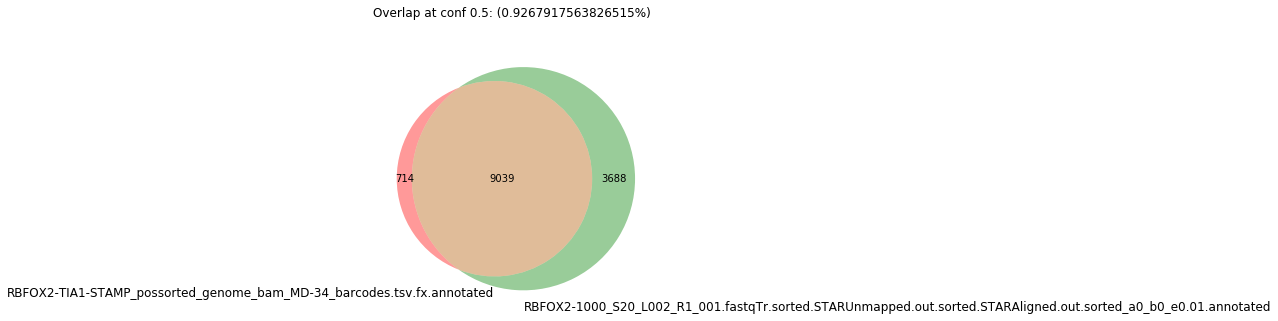

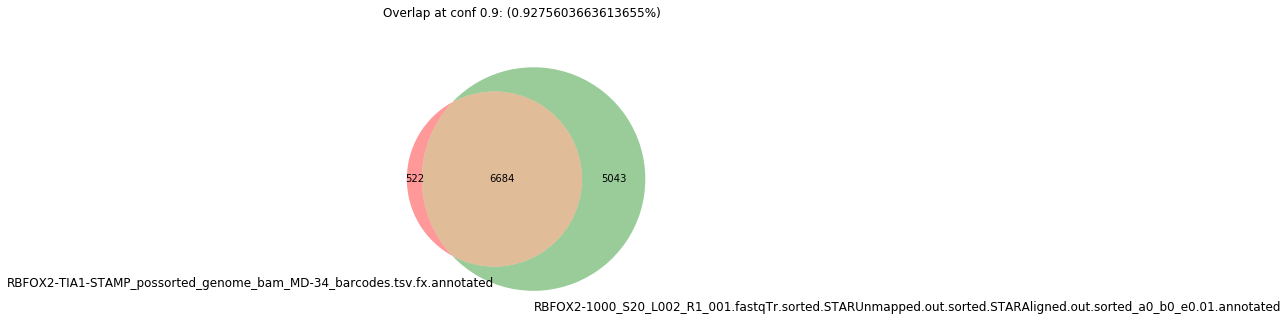

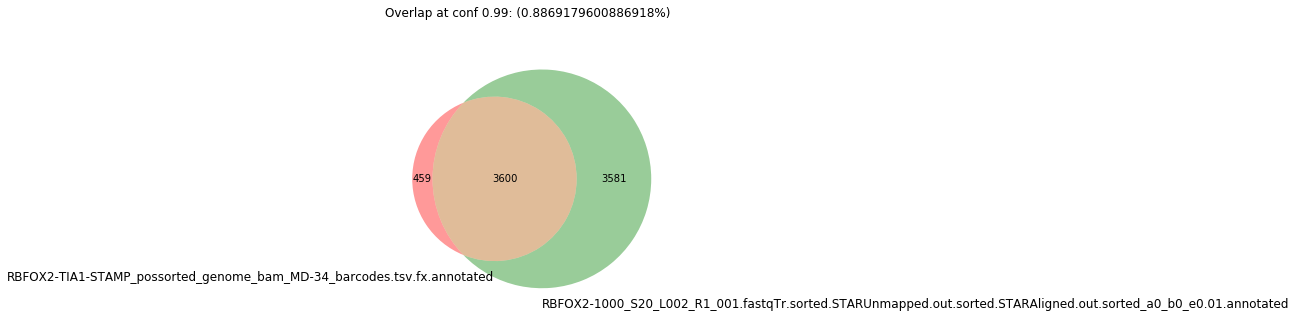

In [5]:
progress = tnrange(4)
for conf in [0, 0.5, 0.9, 0.99]:
    output_file = os.path.join(output_dir, 'overlapping_genelevel_{}_{}.conf{}.svg'.format(os.path.basename(f1), os.path.basename(f2), conf))
    overlap(f1, f2, output_file, conf=conf, level='gene')
    progress.update(1)